<a href="https://colab.research.google.com/github/naphatsiri/DADS-InClass-Master-Degree/blob/main/dads6003_6620412003_K_Means_Clustering_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##6620412003_Naphat_Sirisanon_Homework_K-Means Clustering_28/11/2567

## Apply K-means to cluster this data (What is the best K?)
https://github.com/ekaratnida/Applied-machine-learning/blob/master/Week14-kmeans/Mall_Customers.csv

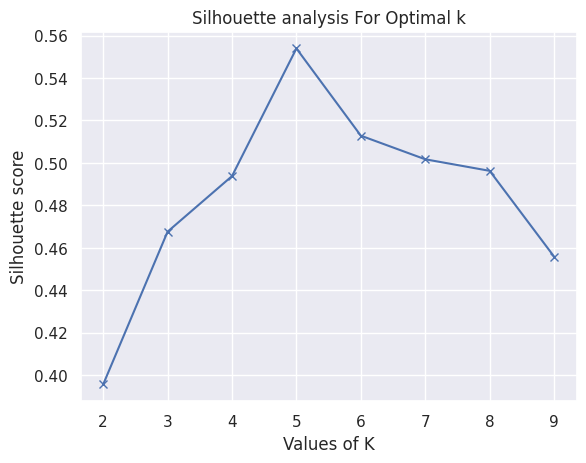

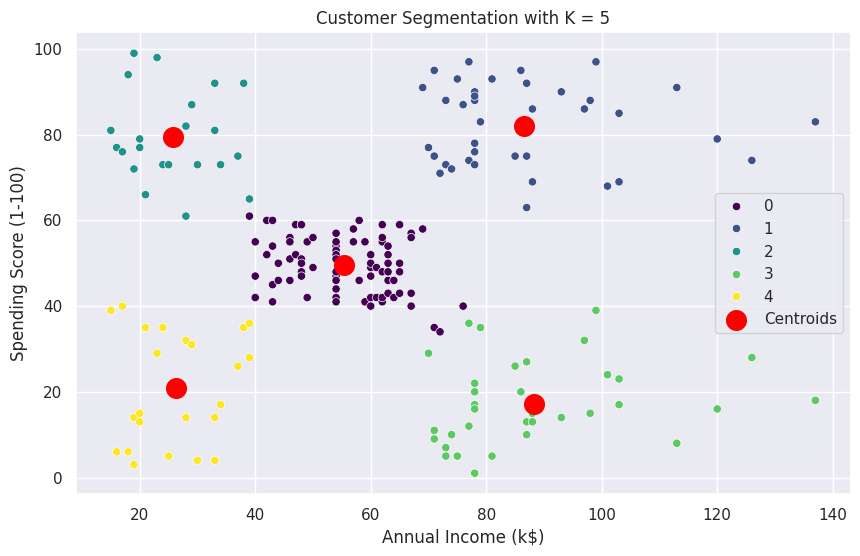

In [ ]:

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.cm as cm
import seaborn as sns; sns.set()
from sklearn.datasets import load_sample_image
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans


path = "https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/refs/heads/master/Week14-kmeans/Mall_Customers.csv"
df = pd.read_csv(path)


X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


range_n_clusters = range(2, 10)
silhouette_avg = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))


plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()


best_k = range_n_clusters[np.argmax(silhouette_avg)]
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title(f'Customer Segmentation with K = {best_k}')
plt.legend()
plt.show()